#  Loading datasets

In [47]:
import pandas as pd

energy_efficiency_df = pd.read_csv('/Users/shakthimaha/Downloads/Hackthon_KCL/Energy effieciency/LBSM_All_London.csv', low_memory=False)
all_house_holds_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/Income + Number of individiual/houshold income.xls', sheet_name='iadatasheet1')
fuel_poverty_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/FuelPoverty_2009-2011/fuel poverty.xlsx', sheet_name='LSOA 2009 - 2011')
dwelling_type_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/built period + house types/dwelling-build-period and-property-type-2014-lsoa-msoa.xlsx', sheet_name='Table 2.4')
dwelling_build_period_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/built period + house types/dwelling-build-period and-property-type-2014-lsoa-msoa.xlsx', sheet_name='Table 4.4')
income_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/Income + Number of individiual/houshold income.xls', sheet_name='iadatasheet2')
gas_consumption_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/Gas_Consumption_Domestic/LSOA_domestic_gas_2010-2023.xlsx', sheet_name='2011')
elec_consumption_df = pd.read_excel('/Users/shakthimaha/Downloads/Hackthon_KCL/Electricity_Consumption_Domestic/LSOA_domestic_elec_2010-2023.xlsx', sheet_name='2011')
zcored_data_df = pd.read_csv('/Users/shakthimaha/Downloads/Hackthon_KCL/zcored_data.csv')

In [48]:
fuel_poverty_df.columns = fuel_poverty_df.iloc[0]  # Set the first row as column names
fuel_poverty_df = fuel_poverty_df[1:].reset_index(drop=True)  # Drop the first row and reset index
print(fuel_poverty_df.columns)

Index([  'LSOA 2001 Code',   'LSOA 2001 Name',          'LA Name',
                   2009.0,             2010.0, 'Fuelpoverty-2011'],
      dtype='object', name=0)


In [49]:
gas_consumption_df.columns

Index(['Local authority code', 'Local authority', 'MSOA code',
       'Middle layer super output area', 'LSOA code',
       'Lower layer super output area', 'Number\nof meters\n',
       'Total \nconsumption\n(kWh)', 'Mean consumption',
       'Median consumption (kWh per meter)'],
      dtype='object')

In [50]:
elec_consumption_df.columns

Index(['Local authority code', 'Local authority', 'MSOA code',
       'Middle layer super output area', 'LSOA code',
       'Lower layer super output area', 'Number\nof meters\n',
       'Total \nconsumption\n(kWh)', 'Mean consumption\n',
       'Median consumption (kWh per meter)'],
      dtype='object')

In [51]:
zcored_data_df.columns


Index(['LSOA11CD', 'LSOA11NM', 'geometry', 'Fuel_Poverty_2011',
       'Mean_Elec_Consumption', 'Mean_Gas_Consumption', 'Avg_Build_Year',
       'Median_Annual_household_income', 'Density_of_Households',
       'households_with_resident_percentage',
       'households_no_resident_percentage', 'whole_house_detached_percentage',
       'whole_house_semi_detached_percentage',
       'whole_house_terraced_percentage',
       'flat_maisonette_apartment_percentage',
       'Revised_Energy_Efficiency_Rating_Numeric',
       'Revised_Energy_Efficiency'],
      dtype='object')

In [52]:

# Rename LSOA column for consistency
energy_efficiency_df.rename(columns={'LSOA': 'LSOA11CD'}, inplace=True)
fuel_poverty_df.rename(columns={'LSOA 2001 Code': 'LSOA11CD'}, inplace=True)
dwelling_type_df.rename(columns={'Area Code': 'LSOA11CD'}, inplace=True)
dwelling_build_period_df.rename(columns={'Area Code3': 'LSOA11CD'}, inplace=True)
income_df.rename(columns={'Codes': 'LSOA11CD'}, inplace=True)
gas_consumption_df.rename(columns={'LSOA code': 'LSOA11CD'}, inplace=True)
elec_consumption_df.rename(columns={'LSOA code': 'LSOA11CD'}, inplace=True)
all_house_holds_df.rename(columns={'Codes': 'LSOA11CD'}, inplace=True)


In [53]:
for df_name, df in {
    'energy_efficiency_df': energy_efficiency_df,
    'fuel_poverty_df': fuel_poverty_df,
    'dwelling_type': dwelling_type_df,
    'dwelling_build_period_df': dwelling_build_period_df,
    'income_tax_payers_df': income_df,
    'gas_consumption_df': gas_consumption_df,
    'elec_consumption_df': elec_consumption_df,
    'zcored_data_df': zcored_data_df,
    'all_house_holds_df': all_house_holds_df,
    
}.items():
    if 'LSOA11CD' not in df.columns:
        print(f"Warning: {df_name} does not contain 'LSOA11CD'")

In [54]:
# Check the number of unique LSOA codes in the zcored_data_df
num_lsoa_codes = zcored_data_df['LSOA11CD'].nunique()
print(f"Number of unique LSOA codes: {num_lsoa_codes}")

Number of unique LSOA codes: 4642


In [55]:
# Check the number of rows in the zcored_data_df
num_rows = zcored_data_df.shape[0]
print(f"Number of rows in the zcored_data_df: {num_rows}")

Number of rows in the zcored_data_df: 4642


# Merging the dataset


In [56]:
import pandas as pd
import numpy as np

# Ensure there are no duplicates in each dataset before merging
energy_efficiency_df = energy_efficiency_df.drop_duplicates(subset=['LSOA11CD'])
income_df = income_df.drop_duplicates(subset=['LSOA11CD'])
fuel_poverty_df = fuel_poverty_df.drop_duplicates(subset=['LSOA11CD'])
dwelling_type_df = dwelling_type_df.drop_duplicates(subset=['LSOA11CD'])
dwelling_build_period_df = dwelling_build_period_df.drop_duplicates(subset=['LSOA11CD'])
gas_consumption_df = gas_consumption_df.drop_duplicates(subset=['LSOA11CD'])
elec_consumption_df = elec_consumption_df.drop_duplicates(subset=['LSOA11CD'])
zcored_data_df = zcored_data_df.drop_duplicates(subset=['LSOA11CD'])
all_house_holds_df = all_house_holds_df.drop_duplicates(subset=['LSOA11CD'])

# Select relevant columns (keep this as before)
energy_efficiency_df = energy_efficiency_df[['LSOA11CD', 'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA', 'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA']]
income_df = income_df[['LSOA11CD','Median Annual Household Income estimate (£)']]
fuel_poverty_df = fuel_poverty_df[['LSOA11CD', 'Fuelpoverty-2011']]
dwelling_type_df = dwelling_type_df[['LSOA11CD', 'Flat/Maisonette Total', 'House Terraced Total', 'House Semi-detached Total', 'House Detached Total']]
dwelling_build_period_df = dwelling_build_period_df[['LSOA11CD', 'Pre 1900', '1900 to 1918', '1919 to 1929', '1930 to 1939', '1945 to 1954', '1955 to 1964', 
                              '1965 to 1972', '1973 to 1982', '1983 to 1992', '1993 to 1999', '2000 to 2009', '2010 to 2012']]
gas_consumption_df = gas_consumption_df[['LSOA11CD', 'Median consumption (kWh per meter)']]
elec_consumption_df = elec_consumption_df[['LSOA11CD', 'Median consumption (kWh per meter)']]
zcored_data_df = zcored_data_df[['LSOA11CD', 'LSOA11NM', 'geometry']]
all_house_holds_df = all_house_holds_df[['LSOA11CD', 'All households 2011']]

# Merge all datasets on LSOA11CD with left join to retain all rows from zcored_data_df
merged_df = zcored_data_df \
    .merge(energy_efficiency_df, on='LSOA11CD', how='left') \
    .merge(income_df, on='LSOA11CD', how='left') \
    .merge(fuel_poverty_df, on='LSOA11CD', how='left') \
    .merge(dwelling_type_df, on='LSOA11CD', how='left') \
    .merge(dwelling_build_period_df, on='LSOA11CD', how='left') \
    .merge(gas_consumption_df, on='LSOA11CD', how='left') \
    .merge(elec_consumption_df, on='LSOA11CD', how='left') \
    .merge(all_house_holds_df, on='LSOA11CD', how='left')  # Added the all_house_holds_df merge

# Replace all dashes with NaN
merged_df.replace('-', np.nan, inplace=True)

# Display the first few rows of the merged DataFrame to check
print(merged_df.head())

# Check the shape of the merged dataset to confirm the number of rows
print(f"Number of rows in merged dataset: {merged_df.shape[0]}")

# Optionally, save the final merged dataset to a CSV
output_file = '/Users/shakthimaha/Downloads/Hackthon_KCL/merged_data.csv'
merged_df.to_csv(output_file, index=False)

print(f"Merged data saved to {output_file}")

    LSOA11CD                   LSOA11NM  \
0  E01000001        City of London 001A   
1  E01000002        City of London 001B   
2  E01000003        City of London 001C   
3  E01000005        City of London 001E   
4  E01000006  Barking and Dagenham 016A   

                                            geometry  \
0  POLYGON ((-0.097262816705372 51.52157881522085...   
1  POLYGON ((-0.0881031757855782 51.5194123775888...   
2  POLYGON ((-0.0967598383726936 51.5232512920432...   
3  POLYGON ((-0.0732048670708826 51.5100037359235...   
4  POLYGON ((0.0911789815733874 51.53908634564686...   

   AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA  \
0                                              64.0   
1                                              55.0   
2                                               NaN   
3                                              61.0   
4                                               NaN   

  AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA  \
0                      

/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_28551/1119302119.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.replace('-', np.nan, inplace=True)


# cleaning the merged dataset

In [57]:
import geopandas as gpd
import pandas as pd

# Load dataset
df = pd.read_csv("/Users/shakthimaha/Downloads/Hackthon_KCL/merged_data.csv")

# Define new column names
new_column_names = {
    "LSOA11CD": "Lsoa_code",
    "LSOA11NM": "Lsoa_name",
    "geometry": "Geometry",
    "AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA": "energy_efficiency_floor_area",
    "AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA": "energy_rating_floor_area",
    "Median £ 2011-12": "median_income_2011_12",
    "Number of Individuals2011-12": "number_of_individuals_2011_12",
    "Fuelpoverty-2011": "Fuelpoverty-2011",
    "Flat/Maisonette Total": "flat_maisonette_total",
    "House Terraced Total": "house_terraced_total",
    "House Semi-detached Total": "house_semi_detached_total",
    "House Detached Total": "house_detached_total",
    "Pre 1900": "built_pre_1900",
    "1900 to 1918": "built_1900_1918",
    "1919 to 1929": "built_1919_1929",
    "1930 to 1939": "built_1930_1939",
    "1945 to 1954": "built_1945_1954",
    "1955 to 1964": "built_1955_1964",
    "1965 to 1972": "built_1965_1972",
    "1973 to 1982": "built_1973_1982",
    "1983 to 1992": "built_1983_1992",
    "1993 to 1999": "built_1993_1999",
    "2000 to 2009": "built_2000_2009",
    "2010 to 2012": "built_2010_2012",
    "Median consumption (kWh per meter)_x": "Gas median consumption (kwh)",
    "Median consumption (kWh per meter)_y": "Electricity median_consumption (kwh)",
   
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)

# Display updated column names
print(df.head())

   Lsoa_code                  Lsoa_name  \
0  E01000001        City of London 001A   
1  E01000002        City of London 001B   
2  E01000003        City of London 001C   
3  E01000005        City of London 001E   
4  E01000006  Barking and Dagenham 016A   

                                            Geometry  \
0  POLYGON ((-0.097262816705372 51.52157881522085...   
1  POLYGON ((-0.0881031757855782 51.5194123775888...   
2  POLYGON ((-0.0967598383726936 51.5232512920432...   
3  POLYGON ((-0.0732048670708826 51.5100037359235...   
4  POLYGON ((0.0911789815733874 51.53908634564686...   

   energy_efficiency_floor_area energy_rating_floor_area  \
0                          64.0                        D   
1                          55.0                        E   
2                           NaN                      NaN   
3                          61.0                        D   
4                           NaN                      NaN   

   Median Annual Household Income estimate 

In [58]:
# Calculate the percentage of missing values in each column
null_percentage = df.isnull().mean() * 100

# Display the columns with their null percentage
print(null_percentage)

Lsoa_code                                       0.000000
Lsoa_name                                       0.000000
Geometry                                        0.000000
energy_efficiency_floor_area                   42.007755
energy_rating_floor_area                       42.007755
Median Annual Household Income estimate (£)     0.000000
Fuelpoverty-2011                                0.000000
flat_maisonette_total                           2.003447
house_terraced_total                            4.200776
house_semi_detached_total                      21.154675
house_detached_total                           48.276605
built_pre_1900                                 29.707023
built_1900_1918                                38.345541
built_1919_1929                                44.054287
built_1930_1939                                26.518742
built_1945_1954                                39.918139
built_1955_1964                                31.947436
built_1965_1972                

In [59]:
# Drop columns with > 50% missing values
threshold = 50  # You can adjust this threshold
null_percentage = df.isnull().mean() * 100
df = df.loc[:, null_percentage < threshold]
print("\nColumns dropped due to high missing values.\n")

# Fill missing values for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)  # Using median to handle skewed data

# Fill missing values for categorical columns using Mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    # Impute missing values with the mode (most frequent value)
    mode_value = df[col].mode()[0]  # Get the most frequent value (mode)
    df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode

print("\nMissing values handled successfully!\n")


Columns dropped due to high missing values.


Missing values handled successfully!



/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_28551/1181175063.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Using median to handle skewed data
/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_28551/1181175063.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

In [60]:
# Calculate the percentage of missing values in each column
null_percentage = df.isnull().mean() * 100

# Display the columns with their null percentage
print(null_percentage)

Lsoa_code                                      0.0
Lsoa_name                                      0.0
Geometry                                       0.0
energy_efficiency_floor_area                   0.0
energy_rating_floor_area                       0.0
Median Annual Household Income estimate (£)    0.0
Fuelpoverty-2011                               0.0
flat_maisonette_total                          0.0
house_terraced_total                           0.0
house_semi_detached_total                      0.0
house_detached_total                           0.0
built_pre_1900                                 0.0
built_1900_1918                                0.0
built_1919_1929                                0.0
built_1930_1939                                0.0
built_1945_1954                                0.0
built_1955_1964                                0.0
built_1965_1972                                0.0
built_1973_1982                                0.0
built_1983_1992                

In [61]:
# List all column names to check for any formatting issues
print(df.columns)

Index(['Lsoa_code', 'Lsoa_name', 'Geometry', 'energy_efficiency_floor_area',
       'energy_rating_floor_area',
       'Median Annual Household Income estimate (£)', 'Fuelpoverty-2011',
       'flat_maisonette_total', 'house_terraced_total',
       'house_semi_detached_total', 'house_detached_total', 'built_pre_1900',
       'built_1900_1918', 'built_1919_1929', 'built_1930_1939',
       'built_1945_1954', 'built_1955_1964', 'built_1965_1972',
       'built_1973_1982', 'built_1983_1992', 'built_2000_2009',
       'Gas median consumption (kwh)', 'Electricity median_consumption (kwh)',
       'All households 2011'],
      dtype='object')


In [62]:
# Strip any leading/trailing whitespaces in column names
df.columns = df.columns.str.strip()

# Correlation Analysis

Fuelpoverty-2011                               1.000000
Gas median consumption (kwh)                   0.208824
Electricity median_consumption (kwh)           0.147429
house_semi_detached_total                      0.117905
built_1919_1929                                0.101902
built_1930_1939                                0.095161
house_detached_total                           0.077142
built_1900_1918                                0.054141
house_terraced_total                           0.050400
Median Annual Household Income estimate (£)    0.033596
energy_efficiency_floor_area                  -0.003514
built_pre_1900                                -0.015278
built_1945_1954                               -0.022140
built_1955_1964                               -0.026111
built_2000_2009                               -0.083319
built_1965_1972                               -0.098774
built_1973_1982                               -0.107054
built_1983_1992                               -0

/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_28551/2338231531.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette=colors)


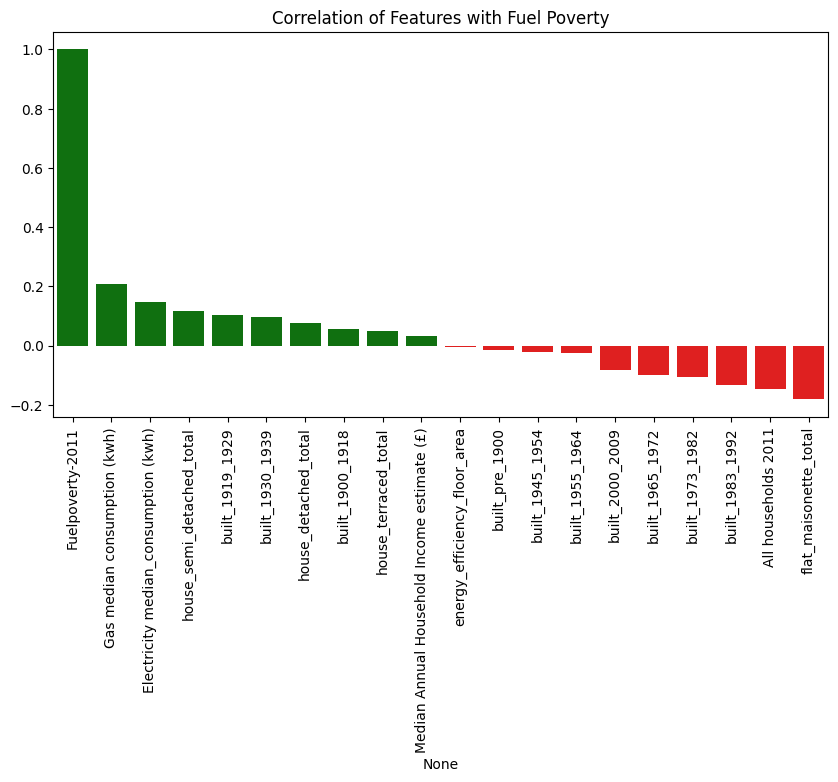

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute correlation with 'Fuelpoverty-2011'
correlation = df[numeric_cols].corr()["Fuelpoverty-2011"].sort_values(ascending=False)

# Print the correlations
print(correlation)

# Create a custom color palette for positive and negative correlations
colors = ['green' if val > 0 else 'red' for val in correlation.values]

# Visualizing top correlations with different colors for positive and negative correlations
plt.figure(figsize=(10,5))
sns.barplot(x=correlation.index, y=correlation.values, palette=colors)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Fuel Poverty")
plt.show()

In [64]:
df.columns

Index(['Lsoa_code', 'Lsoa_name', 'Geometry', 'energy_efficiency_floor_area',
       'energy_rating_floor_area',
       'Median Annual Household Income estimate (£)', 'Fuelpoverty-2011',
       'flat_maisonette_total', 'house_terraced_total',
       'house_semi_detached_total', 'house_detached_total', 'built_pre_1900',
       'built_1900_1918', 'built_1919_1929', 'built_1930_1939',
       'built_1945_1954', 'built_1955_1964', 'built_1965_1972',
       'built_1973_1982', 'built_1983_1992', 'built_2000_2009',
       'Gas median consumption (kwh)', 'Electricity median_consumption (kwh)',
       'All households 2011'],
      dtype='object')

# Exploratory Data Analysis 

#### distribution  of fuel poverty


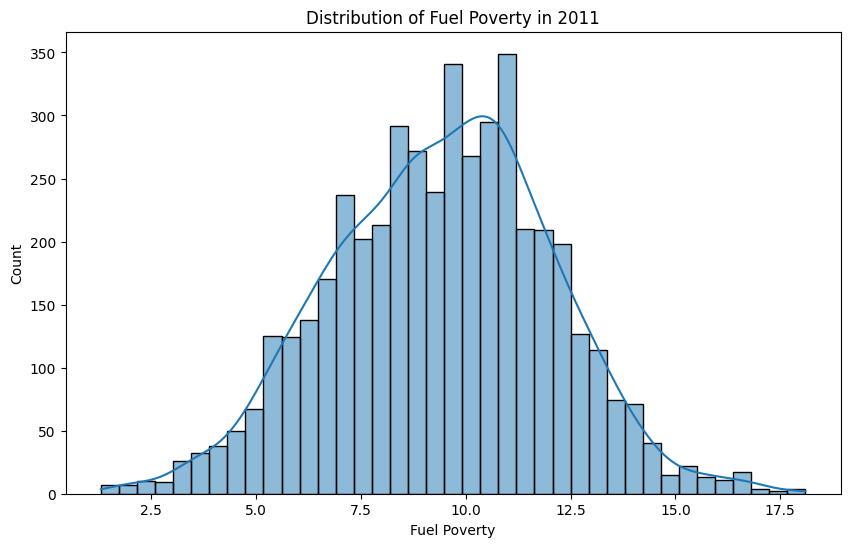

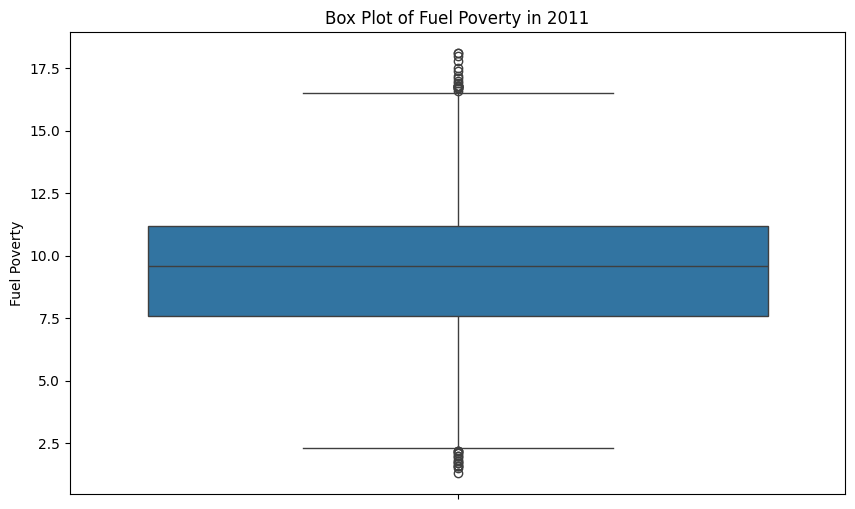

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fuelpoverty-2011'], kde=True)
plt.title('Distribution of Fuel Poverty in 2011')
plt.xlabel('Fuel Poverty')
plt.show()

# Box plot to show outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Fuelpoverty-2011'])
plt.title('Box Plot of Fuel Poverty in 2011')
plt.ylabel('Fuel Poverty')
plt.show()


In [ ]:
# Define thresholds for outliers
upper_threshold = df['Fuelpoverty-2011'].quantile(0.95)
lower_threshold = df['Fuelpoverty-2011'].quantile(0.05)

# Filter high and low outliers
high_outliers = df[df['Fuelpoverty-2011'] > upper_threshold]
low_outliers = df[df['Fuelpoverty-2011'] < lower_threshold]

print("High Outliers:")
print(high_outliers.describe())

print("\nLow Outliers:")
print(low_outliers.describe())

High Outliers:
       energy_efficiency_floor_area  \
count                    214.000000   
mean                      60.252336   
std                       13.072994   
min                      -11.000000   
25%                       58.250000   
50%                       62.000000   
75%                       63.000000   
max                       98.000000   

       Median Annual Household Income estimate (£)  Fuelpoverty-2011  \
count                                   214.000000        214.000000   
mean                                  37298.823314         14.834112   
std                                   12292.643768          1.072273   
min                                   17484.958105         13.700000   
25%                                   27974.601179         14.000000   
50%                                   35222.012942         14.400000   
75%                                   45081.876558         15.500000   
max                                   76531.361822       

#### Housing Characteristics

/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_28551/3152935648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=house_types, y=avg_fuel_poverty, palette='viridis')


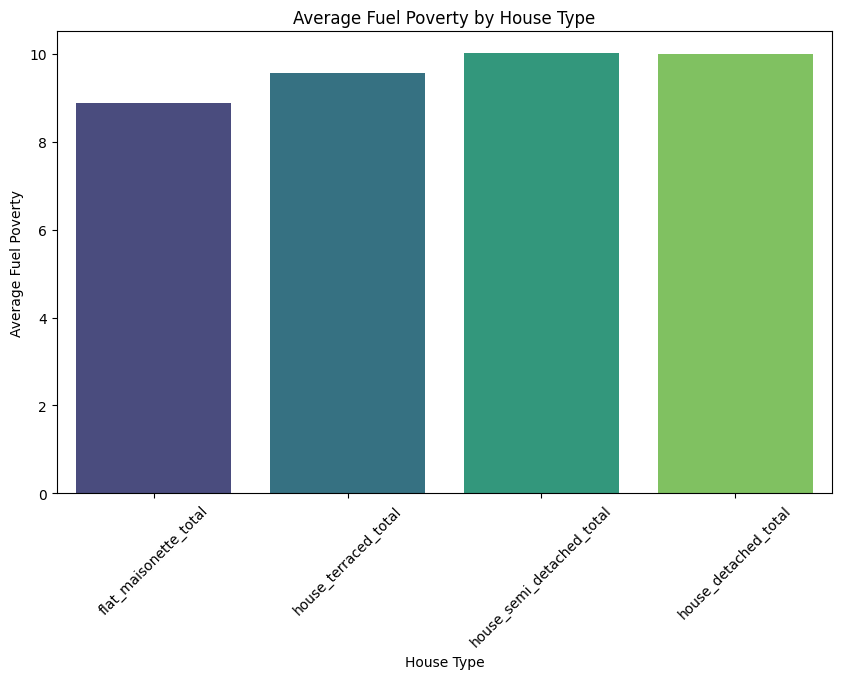

In [ ]:
# Correct visualization: Separate box plots for each house type with fuel poverty
house_types = ['flat_maisonette_total', 'house_terraced_total', 'house_semi_detached_total', 'house_detached_total']

# Calculate average fuel poverty for each house type
avg_fuel_poverty = []
for house_type in house_types:
    avg_fuel_poverty.append(df.groupby(house_type)['Fuelpoverty-2011'].mean().mean())

# Visualize as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=house_types, y=avg_fuel_poverty, palette='viridis')
plt.title('Average Fuel Poverty by House Type')
plt.xlabel('House Type')
plt.ylabel('Average Fuel Poverty')
plt.xticks(rotation=45)
plt.show()


#### Built period


In [ ]:
# Predefined construction period categories
construction_periods = [
    'built_pre_1900', 'built_1900_1918', 'built_1919_1929', 'built_1930_1939',
    'built_1945_1954', 'built_1955_1964', 'built_1965_1972', 'built_1973_1982',
    'built_1983_1992', 'built_2000_2009'
]

# Calculate average fuel poverty for each construction period
avg_fuel_poverty_construction = {}
for period in construction_periods:
    avg_fuel_poverty_construction[period] = df[df[period] > 0]['Fuelpoverty-2011'].mean()

# Convert to DataFrame for easier plotting
avg_fuel_poverty_df = pd.DataFrame(list(avg_fuel_poverty_construction.items()), columns=['Construction Period', 'Average Fuel Poverty'])

# Sort the DataFrame by fuel poverty
avg_fuel_poverty_df = avg_fuel_poverty_df.sort_values(by='Average Fuel Poverty', ascending=False)


/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_28551/1783462670.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_fuel_poverty_df, x='Construction Period', y='Weighted Average Fuel Poverty', palette='coolwarm')


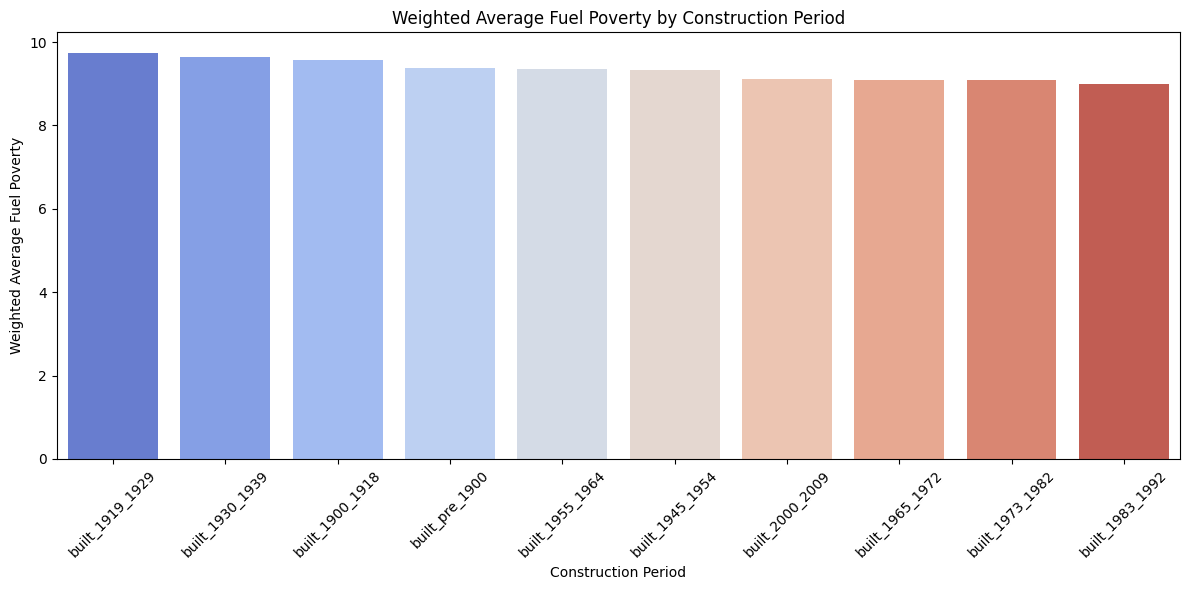

  Construction Period  Weighted Average Fuel Poverty
2     built_1919_1929                       9.746171
3     built_1930_1939                       9.643011
1     built_1900_1918                       9.577441
0      built_pre_1900                       9.387877
5     built_1955_1964                       9.342695
4     built_1945_1954                       9.341386
9     built_2000_2009                       9.114597
6     built_1965_1972                       9.098144
7     built_1973_1982                       9.087311
8     built_1983_1992                       8.986262


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate weighted average fuel poverty for each construction period
weighted_avg_fuel_poverty = {}

for period in construction_periods:
    # Calculate weighted average
    weighted_sum = (df[period] * df['Fuelpoverty-2011']).sum()
    total_houses = df[period].sum()
    if total_houses > 0:
        weighted_avg_fuel_poverty[period] = weighted_sum / total_houses
    else:
        weighted_avg_fuel_poverty[period] = 0

# Convert to DataFrame for visualization
avg_fuel_poverty_df = pd.DataFrame(list(weighted_avg_fuel_poverty.items()), 
                                   columns=['Construction Period', 'Weighted Average Fuel Poverty'])

# Sort the DataFrame by fuel poverty
avg_fuel_poverty_df = avg_fuel_poverty_df.sort_values(by='Weighted Average Fuel Poverty', ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_fuel_poverty_df, x='Construction Period', y='Weighted Average Fuel Poverty', palette='coolwarm')
plt.title('Weighted Average Fuel Poverty by Construction Period')
plt.xlabel('Construction Period')
plt.ylabel('Weighted Average Fuel Poverty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(avg_fuel_poverty_df)


#### Fuel Poverty vs Gas Consumption by House Type

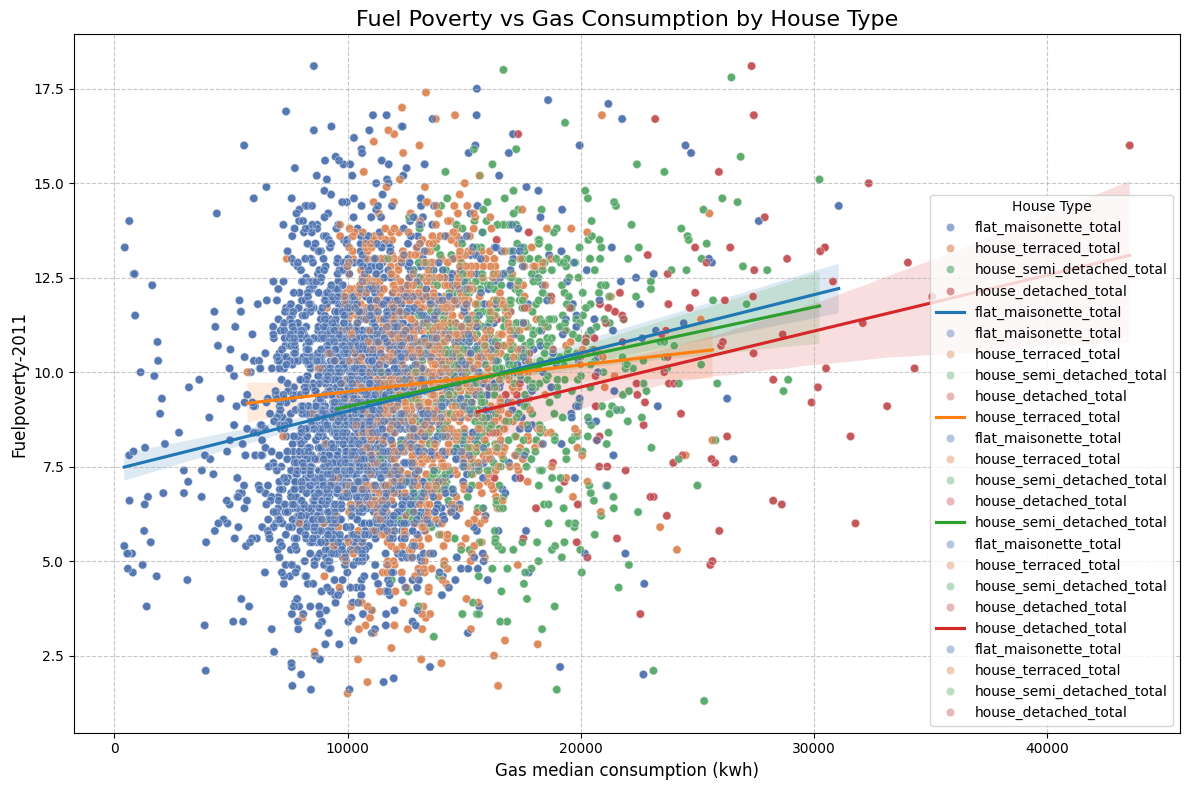

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a new column for house type
df['House Type'] = df[['flat_maisonette_total', 'house_terraced_total', 'house_semi_detached_total', 'house_detached_total']].idxmax(axis=1)

# Create a scatter plot with different colors for each house type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Gas median consumption (kwh)', y='Fuelpoverty-2011', 
                hue='House Type', palette='deep', alpha=0.6)

plt.title('Fuel Poverty vs Gas Consumption by House Type', fontsize=16)
plt.xlabel('Gas Consumption (kWh)', fontsize=12)
plt.ylabel('Fuel Poverty', fontsize=12)
plt.legend(title="House Type", title_fontsize='12', fontsize='10')

# Add a linear regression line for each house type
for house_type in df['House Type'].unique():
    sns.regplot(data=df[df['House Type'] == house_type], 
                x='Gas median consumption (kwh)', y='Fuelpoverty-2011', 
                scatter=False, label=house_type)
    sns.scatterplot(data=df, x='Gas median consumption (kwh)', y='Fuelpoverty-2011', 
                hue='House Type', palette='deep', alpha=0.4)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


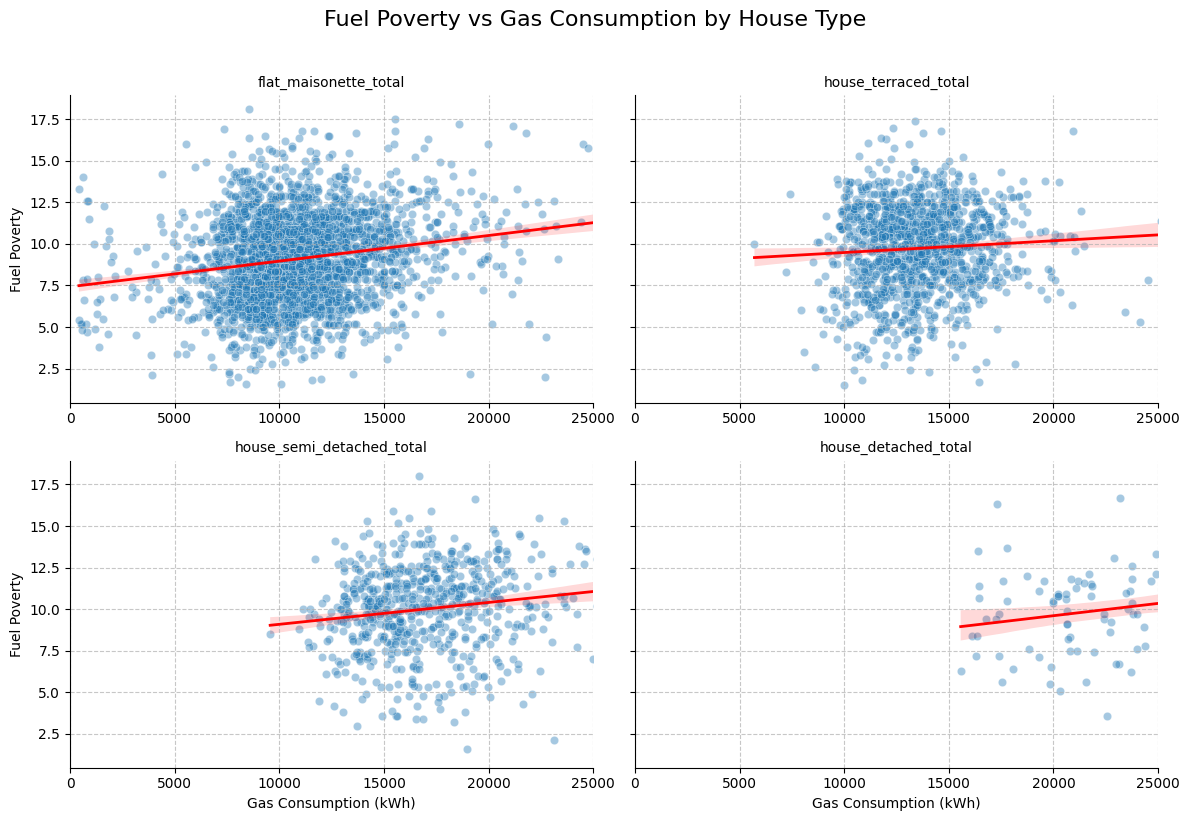

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataframe
# Create a new column for house type if not already done
df['House Type'] = df[['flat_maisonette_total', 'house_terraced_total', 'house_semi_detached_total', 'house_detached_total']].idxmax(axis=1)

# Create the faceted plot
g = sns.FacetGrid(df, col="House Type", col_wrap=2, height=4, aspect=1.5, sharex=False, sharey=True)

# Plot scatterplots and regression lines
def plot_scatter_and_reg(x, y, **kwargs):
    sns.scatterplot(x=x, y=y, alpha=0.4)
    sns.regplot(x=x, y=y, scatter=False, color='red', line_kws={"linewidth": 2})

g.map(plot_scatter_and_reg, "Gas median consumption (kwh)", "Fuelpoverty-2011")

# Customize the plot
g.set_axis_labels("Gas Consumption (kWh)", "Fuel Poverty")
g.set_titles("{col_name}")

# Set x-axis limits for each subplot, focusing on relevant range
for ax in g.axes.flat:
    ax.set_xlim(0, 25000)  # Adjust this range as needed
    ax.grid(True, linestyle='--', alpha=0.7)

# Add a main title
g.fig.suptitle('Fuel Poverty vs Gas Consumption by House Type', fontsize=16, y=1.02)

# Adjust layout and display
plt.tight_layout()
plt.show()


#### Pairplot of Income, Energy Consumption, and Fuel Poverty

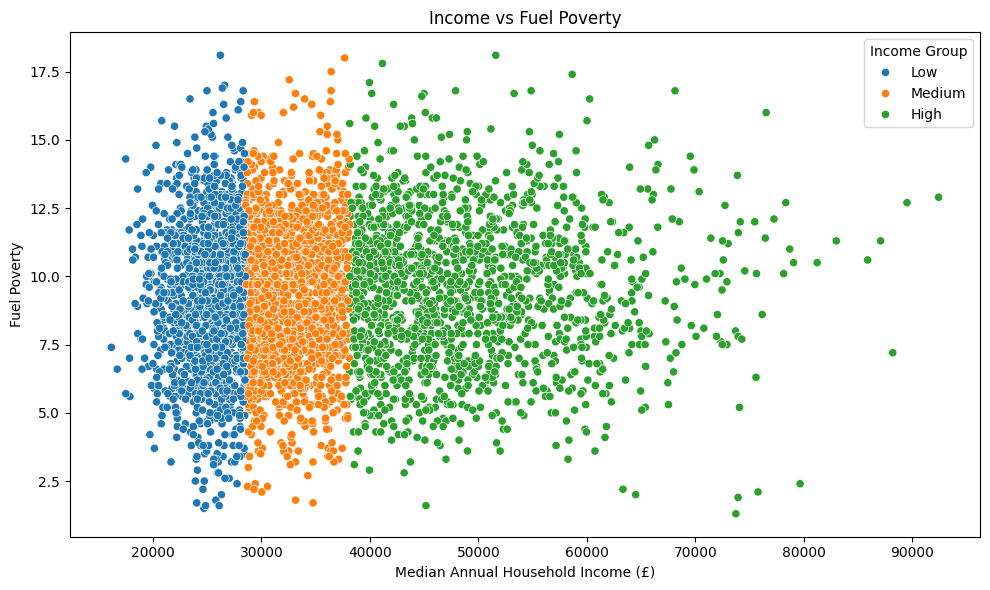

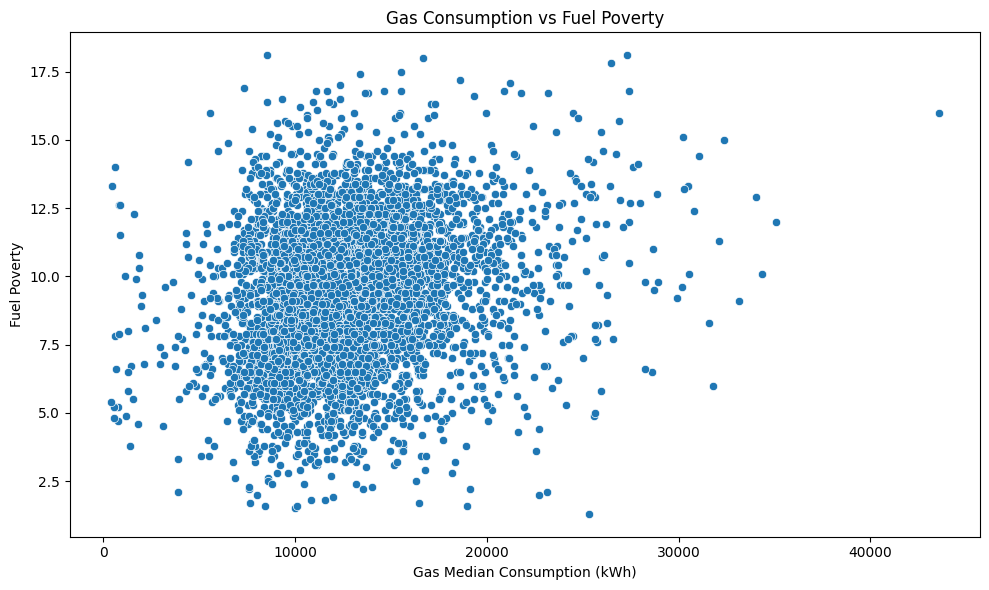

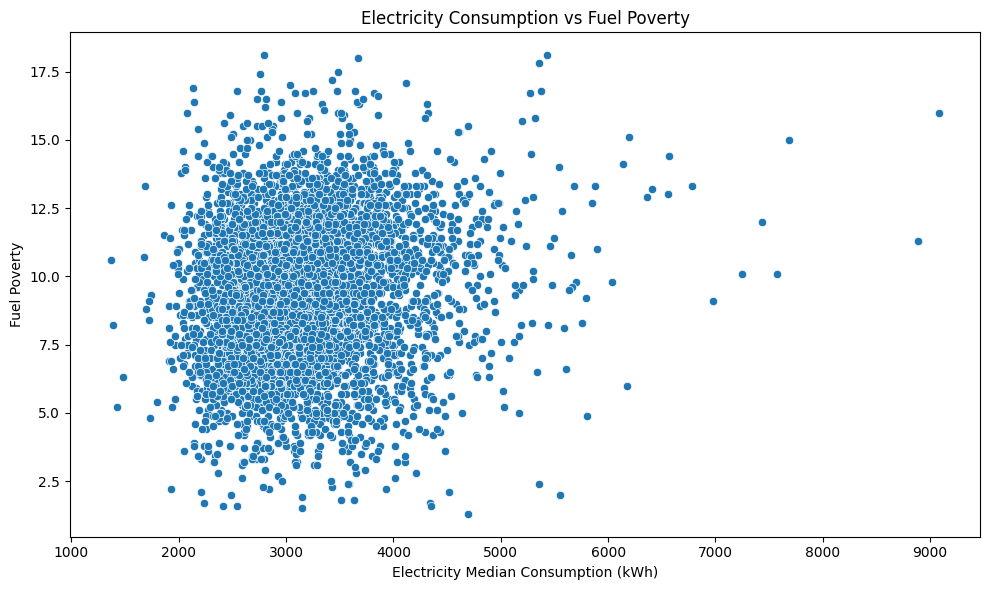

Correlations with Fuel Poverty:
Fuelpoverty-2011                               1.000000
Gas median consumption (kwh)                   0.208824
Electricity median_consumption (kwh)           0.147429
Median Annual Household Income estimate (£)    0.033596
Name: Fuelpoverty-2011, dtype: float64


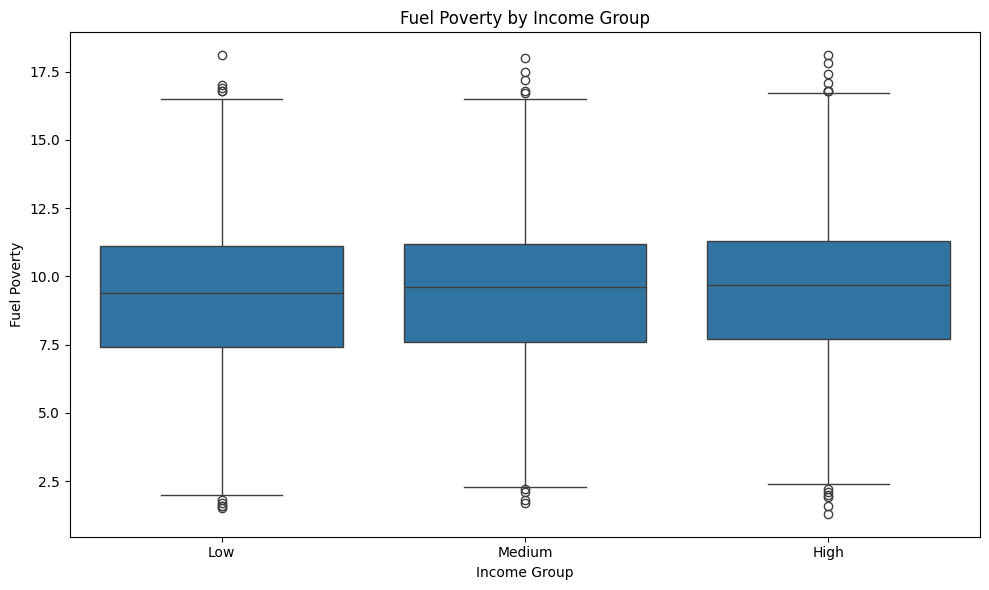

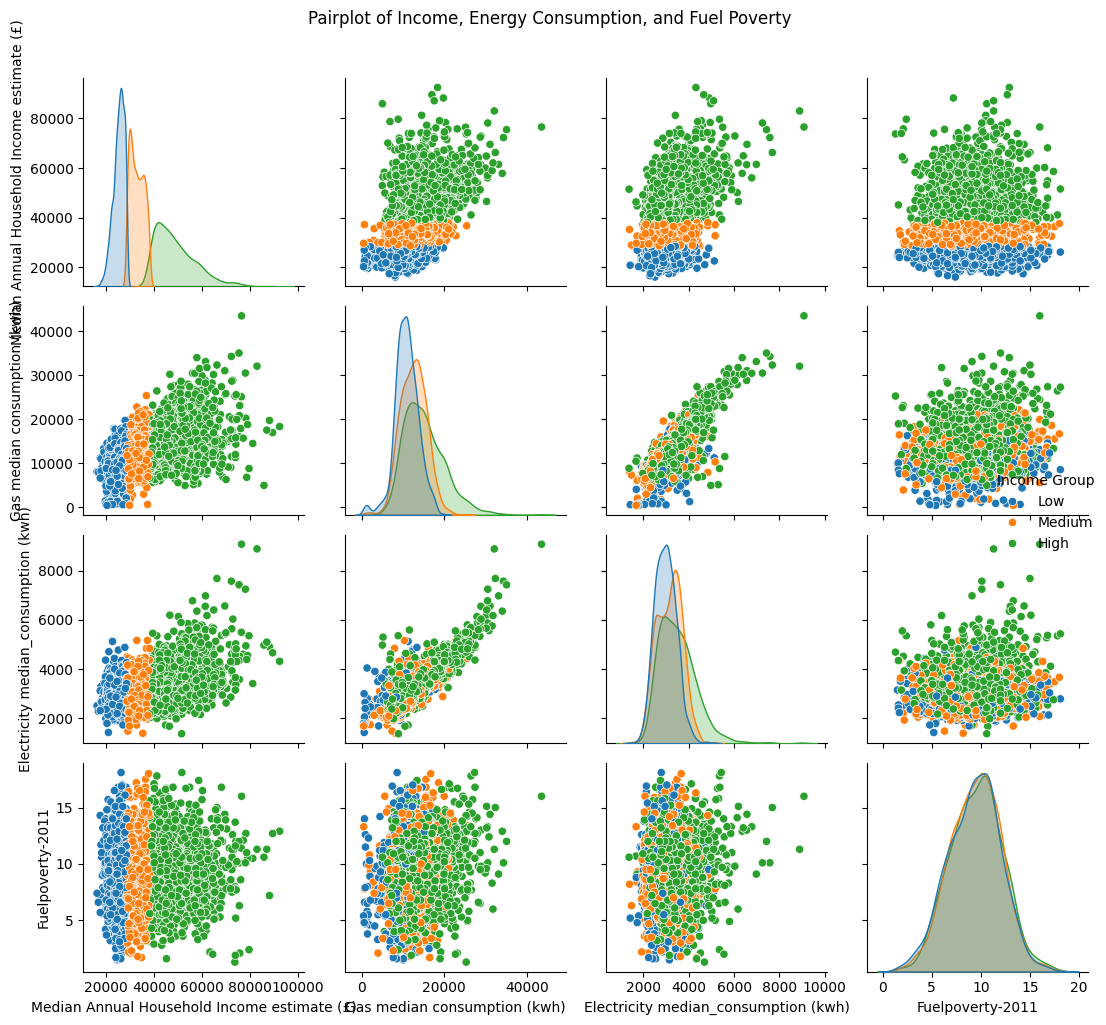

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your dataframe is called 'df'

# Create Income Group if it doesn't exist
if 'Income Group' not in df.columns:
    df['Income Group'] = pd.qcut(df['Median Annual Household Income estimate (£)'], 
                                 q=3, labels=['Low', 'Medium', 'High'])

# 1. Scatter plot: Income vs Fuel Poverty
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Median Annual Household Income estimate (£)', y='Fuelpoverty-2011', hue='Income Group')
plt.title('Income vs Fuel Poverty')
plt.xlabel('Median Annual Household Income (£)')
plt.ylabel('Fuel Poverty')
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()

# 2. Scatter plot: Gas Consumption vs Fuel Poverty
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gas median consumption (kwh)', y='Fuelpoverty-2011')
plt.title('Gas Consumption vs Fuel Poverty')
plt.xlabel('Gas Median Consumption (kWh)')
plt.ylabel('Fuel Poverty')
plt.tight_layout()
plt.show()

# 3. Scatter plot: Electricity Consumption vs Fuel Poverty
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Electricity median_consumption (kwh)', y='Fuelpoverty-2011')
plt.title('Electricity Consumption vs Fuel Poverty')
plt.xlabel('Electricity Median Consumption (kWh)')
plt.ylabel('Fuel Poverty')
plt.tight_layout()
plt.show()

# 4. Correlation analysis
correlation_columns = ['Median Annual Household Income estimate (£)', 
                       'Gas median consumption (kwh)', 
                       'Electricity median_consumption (kwh)', 
                       'Fuelpoverty-2011']

correlations = df[correlation_columns].corr()['Fuelpoverty-2011'].sort_values(ascending=False)
print("Correlations with Fuel Poverty:")
print(correlations)

# 5. Box plot: Fuel Poverty by Income Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Income Group', y='Fuelpoverty-2011')
plt.title('Fuel Poverty by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Fuel Poverty')
plt.tight_layout()
plt.show()

# 6. Pairplot for all variables
sns.pairplot(df[correlation_columns + ['Income Group']], hue='Income Group')
plt.suptitle('Pairplot of Income, Energy Consumption, and Fuel Poverty', y=1.02)
plt.tight_layout()
plt.show()


# Cluster analysis

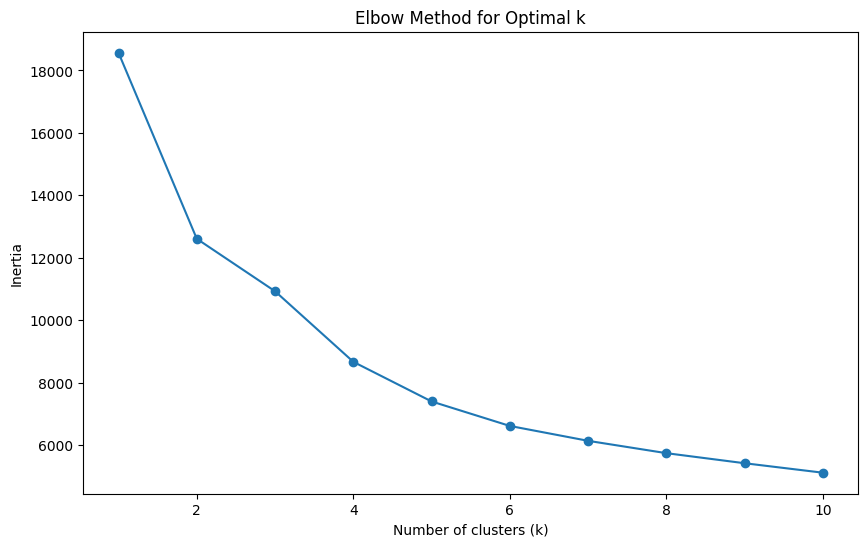

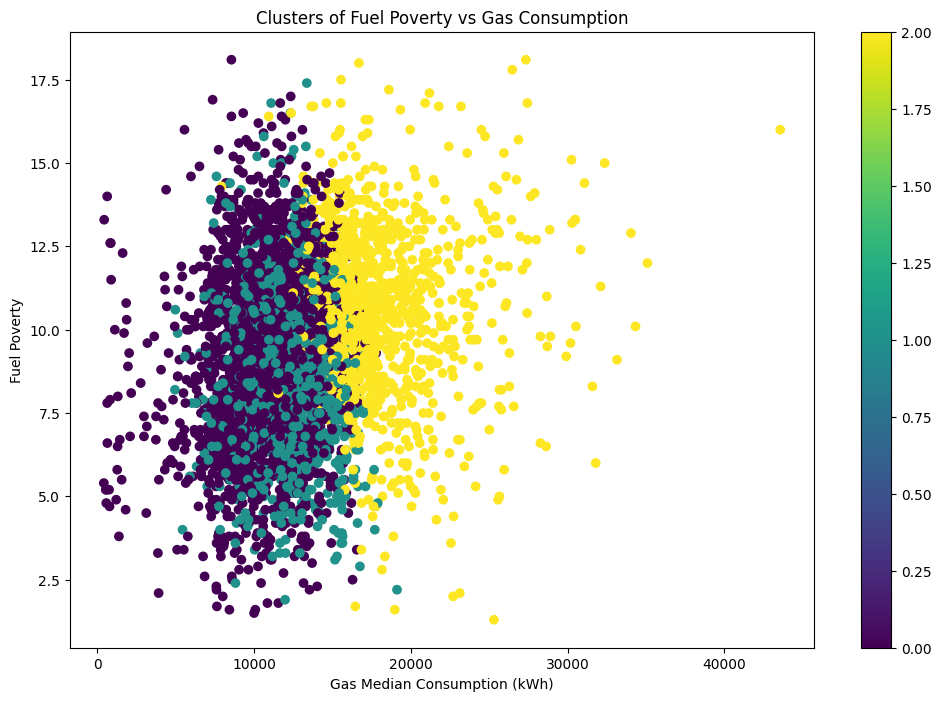

Cluster Means:
         Fuelpoverty-2011  Median Annual Household Income estimate (£)  \
Cluster                                                                  
0                9.191342                                 28548.557624   
1                8.573264                                 49267.578724   
2               10.674885                                 42577.372590   

         Gas median consumption (kwh)  Electricity median_consumption (kwh)  
Cluster                                                                      
0                        10779.280193                           2925.574954  
1                        12166.730903                           3038.579167  
2                        18194.478381                           4030.017939  


In [91]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called 'df'

# 1. Select features for clustering
features = ['Fuelpoverty-2011', 'Median Annual Household Income estimate (£)', 
            'Gas median consumption (kwh)', 'Electricity median_consumption (kwh)']

# 2. Prepare the data
X = df[features]

# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Determine the optimal number of clusters using the elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 5. Perform K-means clustering with the optimal number of clusters
# Let's say the optimal k is 3 (you should choose based on the elbow curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 6. Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Gas median consumption (kwh)'], 
                      df['Fuelpoverty-2011'], 
                      c=df['Cluster'], 
                      cmap='viridis')
plt.xlabel('Gas Median Consumption (kWh)')
plt.ylabel('Fuel Poverty')
plt.title('Clusters of Fuel Poverty vs Gas Consumption')
plt.colorbar(scatter)
plt.show()

# 7. Analyze cluster characteristics
cluster_means = df.groupby('Cluster')[features].mean()
print("Cluster Means:")
print(cluster_means)


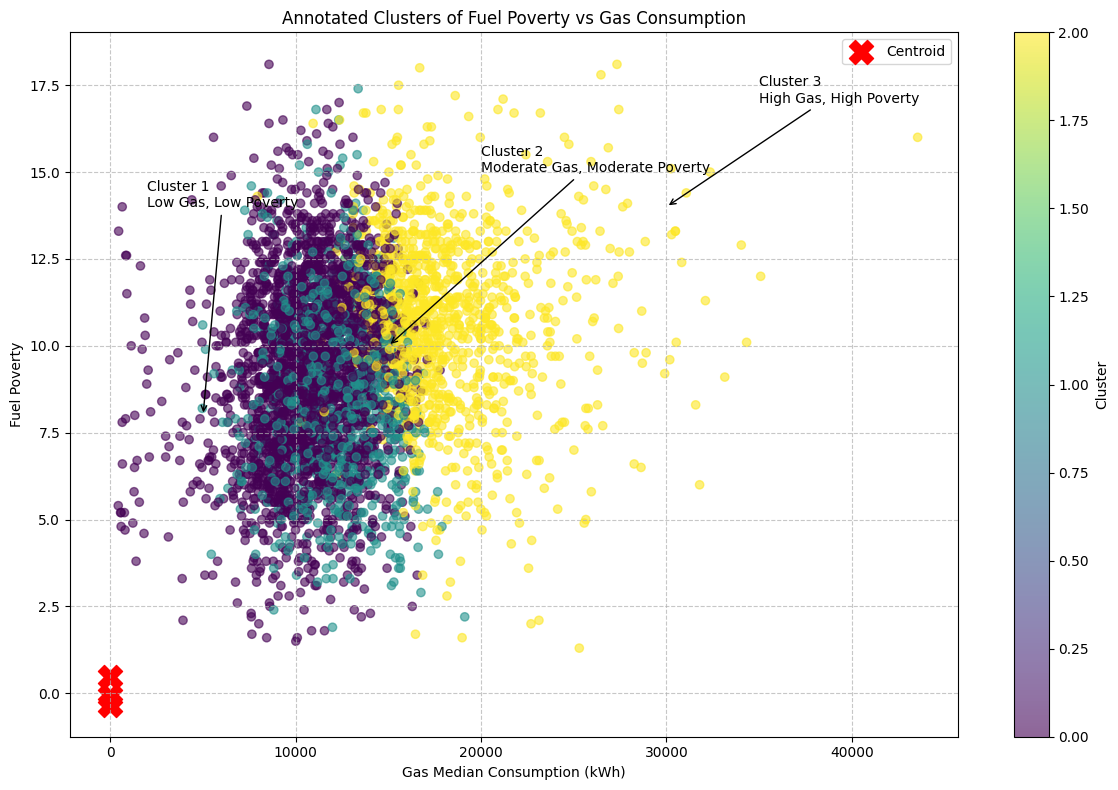

In [98]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Gas median consumption (kwh)'], 
                      df['Fuelpoverty-2011'], 
                      c=df['Cluster'], 
                      cmap='viridis', alpha=0.6)

# Add cluster centers (centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroid')

# Add annotations for each cluster
plt.annotate("Cluster 1\nLow Gas, Low Poverty", xy=(5000, 8), xytext=(2000, 14), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.annotate("Cluster 2\nModerate Gas, Moderate Poverty", xy=(15000, 10), xytext=(20000, 15), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.annotate("Cluster 3\nHigh Gas, High Poverty", xy=(30000, 14), xytext=(35000, 17), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Add grid, legend, and adjust scaling
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Gas Median Consumption (kWh)')
plt.ylabel('Fuel Poverty')
plt.title('Annotated Clusters of Fuel Poverty vs Gas Consumption')
plt.tight_layout()
plt.show()


In [96]:
# Identify rows with zero or near-zero gas consumption
outliers = df[df['Gas median consumption (kwh)'] <= 100]
print("Outliers with near-zero gas consumption:")
print(outliers)

# Remove outliers from the dataset
df_cleaned = df[df['Gas median consumption (kwh)'] > 100]

Outliers with near-zero gas consumption:
Empty DataFrame
Columns: [Lsoa_code, Lsoa_name, Geometry, energy_efficiency_floor_area, energy_rating_floor_area, Median Annual Household Income estimate (£), Fuelpoverty-2011, flat_maisonette_total, house_terraced_total, house_semi_detached_total, house_detached_total, built_pre_1900, built_1900_1918, built_1919_1929, built_1930_1939, built_1945_1954, built_1955_1964, built_1965_1972, built_1973_1982, built_1983_1992, built_2000_2009, Gas median consumption (kwh), Electricity median_consumption (kwh), All households 2011, House Type, Income Group, Cluster]
Index: []

[0 rows x 27 columns]


In [97]:
cluster_means = df.groupby('Cluster')[['Fuelpoverty-2011', 'Median Annual Household Income estimate (£)', 
                                       'Gas median consumption (kwh)', 'Electricity median_consumption (kwh)']].mean()
print(cluster_means)


         Fuelpoverty-2011  Median Annual Household Income estimate (£)  \
Cluster                                                                  
0                9.191342                                 28548.557624   
1                8.573264                                 49267.578724   
2               10.674885                                 42577.372590   

         Gas median consumption (kwh)  Electricity median_consumption (kwh)  
Cluster                                                                      
0                        10779.280193                           2925.574954  
1                        12166.730903                           3038.579167  
2                        18194.478381                           4030.017939  


## Geospatial Data for DBSCAN


In [84]:
df["energy_rating_floor_area"].unique

<bound method Series.unique of 0       D
1       E
2       D
3       D
4       D
       ..
4637    C
4638    E
4639    D
4640    E
4641    F
Name: energy_rating_floor_area, Length: 4642, dtype: object>

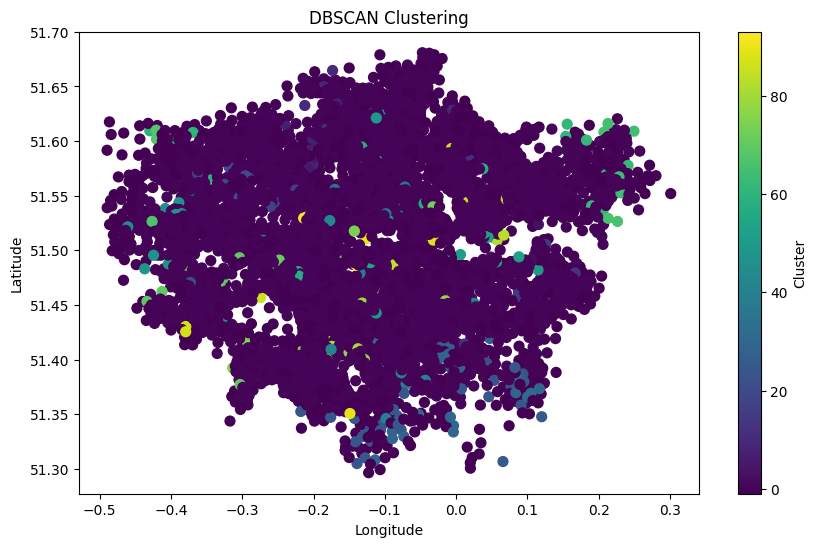

cluster
 0     3251
-1     1157
 24      21
 30       7
 29       5
       ... 
 36       2
 34       2
 33       2
 32       2
 93       2
Name: count, Length: 95, dtype: int64


In [85]:
import pandas as pd
from shapely.wkt import loads as wkt_loads
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
geo_df = df.copy()

# Step 1: Convert WKT strings to Shapely geometries
geo_df['geometry'] = geo_df['Geometry'].apply(wkt_loads)

# Step 2: Extract centroids and coordinates from the geometries
geo_df['coordinates'] = geo_df['geometry'].apply(lambda x: x.centroid.coords[:])
geo_df['coordinates'] = [item[0] for item in geo_df['coordinates']]
geo_df['longitude'] = geo_df['coordinates'].apply(lambda x: x[0])
geo_df['latitude'] = geo_df['coordinates'].apply(lambda x: x[1])

# Step 3: Perform Ordinal Encoding on the 'energy_rating_floor_area' column 
encoder = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']])  
geo_df['energy_rating_floor_area_encoded'] = encoder.fit_transform(geo_df[['energy_rating_floor_area']])

# Step 4: Define the feature columns (including the encoded column)
feature_columns = [
    'energy_rating_floor_area_encoded',  
    'energy_efficiency_floor_area',
    'Median Annual Household Income estimate (£)', 'Fuelpoverty-2011',
    'flat_maisonette_total', 'house_terraced_total', 'house_semi_detached_total',
    'house_detached_total', 'built_pre_1900', 'built_1900_1918', 'built_1919_1929',
    'built_1930_1939', 'built_1945_1954', 'built_1955_1964', 'built_1965_1972',
    'built_1973_1982', 'built_1983_1992', 'built_2000_2009', 'Gas median consumption (kwh)',
    'Electricity median_consumption (kwh)', 'All households 2011', 'longitude', 'latitude'
]

# Step 5: Prepare the feature set X
X = geo_df[feature_columns]

# Step 6: Standardize the data (scaling the numeric columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Apply DBSCAN clustering
dbscan = DBSCAN(eps=2.5, min_samples=2)  # Adjust these hyperparameters based on your data
geo_df['cluster'] = dbscan.fit_predict(X_scaled)

# Step 8: Visualize the clusters (Optional, if you're working with 2D or 3D data)
plt.figure(figsize=(10, 6))
plt.scatter(geo_df['longitude'], geo_df['latitude'], c=geo_df['cluster'], cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Cluster')
plt.show()

# Optionally, print the cluster labels
print(geo_df['cluster'].value_counts())

In [86]:
print(geo_df['cluster'].value_counts())

cluster
 0     3251
-1     1157
 24      21
 30       7
 29       5
       ... 
 36       2
 34       2
 33       2
 32       2
 93       2
Name: count, Length: 95, dtype: int64


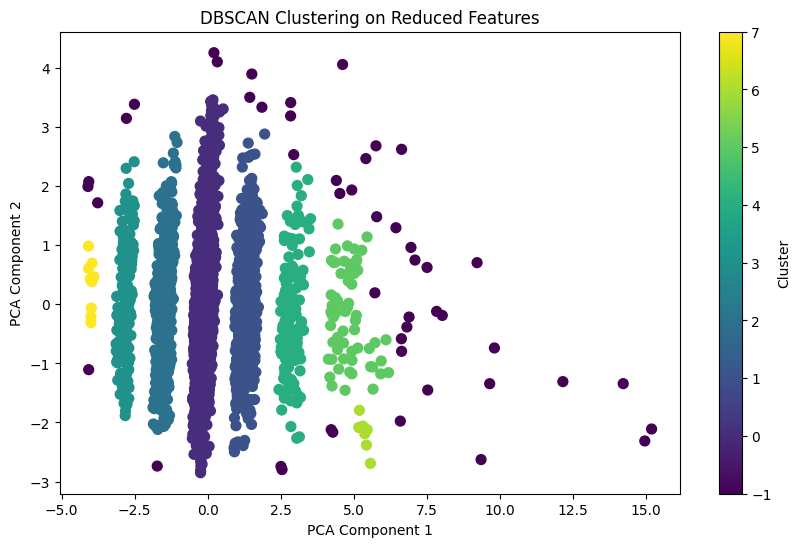

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: Feature selection (for simplicity, use the top features based on domain knowledge)
feature_columns = ['energy_rating_floor_area_encoded', 'energy_efficiency_floor_area', 'Median Annual Household Income estimate (£)', 'Fuelpoverty-2011']

# Step 2: Standardize the data
X = geo_df[feature_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply DBSCAN to the reduced data
dbscan = DBSCAN(eps=0.5, min_samples=5)
geo_df['cluster'] = dbscan.fit_predict(X_pca)

# Step 5: Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=geo_df['cluster'], cmap='viridis', s=50)
plt.title("DBSCAN Clustering on Reduced Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

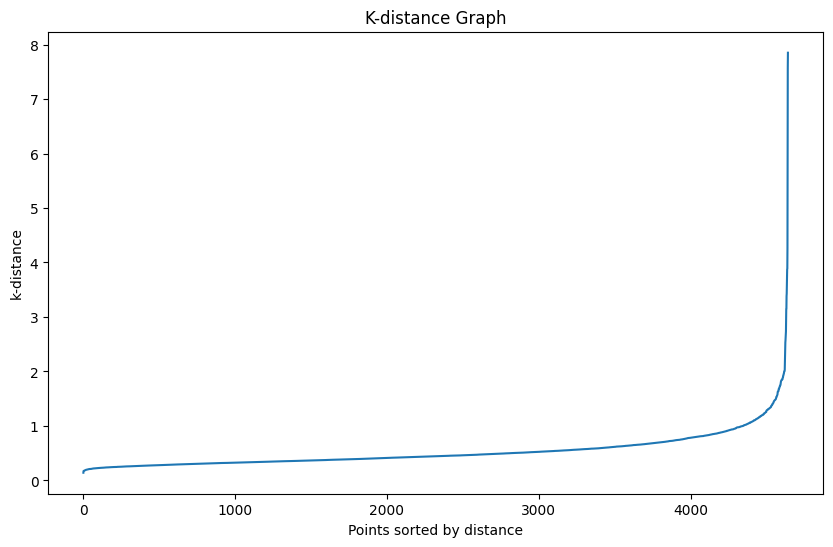

Cluster counts:
cluster
-1    1808
 0    2806
 1       8
 2      10
 3      10
Name: count, dtype: int64

Cluster characteristics:
         energy_efficiency_floor_area  \
cluster                                 
-1                          56.454646   
 0                          62.511048   
 1                          61.625000   
 2                          62.700000   
 3                          61.700000   

         Median Annual Household Income estimate (£)  Fuelpoverty-2011  \
cluster                                                                  
-1                                      40768.529215          9.237887   
 0                                      32220.148822          9.556272   
 1                                      51019.092589         11.700000   
 2                                      59300.337588          6.980000   
 3                                      55256.606013          6.440000   

         Gas median consumption (kwh)  Electricity median_cons

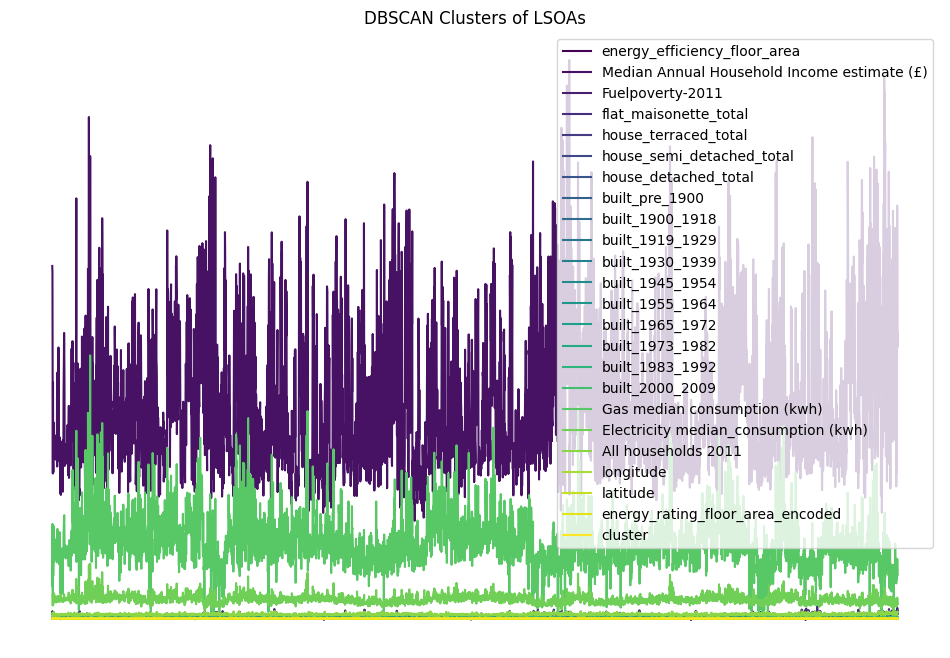

AttributeError: 'DataFrame' object has no attribute 'to_file'

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import geopandas as gpd

# Assuming geo_df is your GeoDataFrame

# 1. Data Preparation
features = [
    'energy_efficiency_floor_area',
    'Median Annual Household Income estimate (£)',
    'Fuelpoverty-2011',
    'Gas median consumption (kwh)',
    'Electricity median_consumption (kwh)'
]

# Drop rows with missing values in the selected features
data = geo_df[features].dropna()

# Normalize the features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# 2. Choose DBSCAN Parameters
# Calculate distances to the k-th nearest neighbor
k = 5  # You can adjust this value
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(normalized_data)
distances, indices = nbrs.kneighbors(normalized_data)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(sorted(distances[:, -1]))
plt.ylabel('k-distance')
plt.xlabel('Points sorted by distance')
plt.title('K-distance Graph')
plt.show()

# Choose eps based on the elbow in the graph (you need to adjust this value)
eps = 0.5  # Example value, adjust based on the graph

# Choose min_samples
min_samples = 2 * len(features)

# 3. Implement DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(normalized_data)

# Add cluster labels to the original DataFrame
geo_df['cluster'] = clusters

# 4. Analyze Results
# Count the number of points in each cluster
cluster_counts = geo_df['cluster'].value_counts().sort_index()
print("Cluster counts:")
print(cluster_counts)

# Analyze characteristics of each cluster
cluster_analysis = geo_df.groupby('cluster')[features].mean()
print("\nCluster characteristics:")
print(cluster_analysis)

# 5. Visualize Clusters
plt.figure(figsize=(12, 8))
geo_df.plot(column='cluster', cmap='viridis', legend=True, ax=plt.gca())
plt.title('DBSCAN Clusters of LSOAs')
plt.axis('off')
plt.show()

# Optional: Save results
geo_df.to_file("clustered_lsoas.shp")  # Save as shapefile
cluster_analysis.to_csv("cluster_analysis.csv")  # Save cluster analysis


In [ ]:
geo_df.columns

#  Feature Scaling (StandardScaler)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is already loaded and named geo_df
# If not, uncomment and modify the following line:
# geo_df = pd.read_csv('your_data_file.csv')

# Step 1: Select relevant features for clustering
features_for_clustering = [
    'Fuelpoverty-2011',
    'Median Annual Household Income estimate (£)',
    'Gas median consumption (kwh)',
    'Electricity median_consumption (kwh)',
    'flat_maisonette_total',
    'house_terraced_total',
    'house_semi_detached_total',
    'house_detached_total',
    'energy_efficiency_floor_area'
]

# Create a new DataFrame with selected features
df_cluster = geo_df[features_for_clustering]

# Step 2: Handle missing values (if any)
df_cluster = df_cluster.dropna()

# Step 3: Normalize the features
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

# Step 4: Determine epsilon using k-distance graph
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_normalized)
distances, indices = neighbors_fit.kneighbors(df_normalized)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

# Step 5: Apply DBSCAN
# Choose an appropriate epsilon value based on the k-distance graph
epsilon = 0.5  # This is an example value, adjust based on your graph
min_samples = 4

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(df_normalized)

# Add cluster labels to the original DataFrame
geo_df['Cluster'] = clusters

# Step 6: Visualize results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=geo_df, x='longitude', y='latitude', hue='Cluster', palette='deep', legend='full')
plt.title('DBSCAN Clustering Results')
plt.show()

# Step 7: Analyze fuel poverty by cluster
cluster_fuel_poverty = geo_df.groupby('Cluster')['Fuelpoverty-2011'].mean().sort_values(ascending=False)
print("Average Fuel Poverty by Cluster:")
print(cluster_fuel_poverty)

# Step 8: Visualize fuel poverty distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Fuelpoverty-2011', data=geo_df)
plt.title('Fuel Poverty Distribution Across Clusters')
plt.show()


In [ ]:
epsilon = 0.8  # Set based on the k-distance graph
min_samples = 5  # Adjust higher if clusters are too fragmented
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(df_normalized)
geo_df['Cluster'] = clusters

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=geo_df, x='longitude', y='latitude', hue='Cluster', palette='deep', legend='full')
plt.title('DBSCAN Clustering Results (Refined)')
plt.show()

In [ ]:
cluster_analysis = geo_df.groupby('Cluster')['Fuelpoverty-2011'].agg(['mean', 'median', 'std', 'count']).sort_values('mean', ascending=False)
print("Cluster-wise Fuel Poverty Analysis:")
print(cluster_analysis)

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Fuelpoverty-2011', data=geo_df)
plt.title('Fuel Poverty Distribution Across Clusters')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Fuelpoverty-2011', data=geo_df, palette='viridis')
plt.title('Fuel Poverty Distribution Across DBSCAN Clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Fuel Poverty Index (2011)', fontsize=12)
plt.ylim(0, geo_df['Fuelpoverty-2011'].quantile(0.99))  # Adjust y-axis to 99th percentile
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(geo_df['longitude'], geo_df['latitude'], 
                      c=geo_df['Cluster'], cmap='viridis', 
                      alpha=0.6, s=geo_df['Fuelpoverty-2011']*50)
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clustering Results with Fuel Poverty Indication', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


In [ ]:
import folium

# Initialize a map centered around the middle of your data
map_center = [geo_df['latitude'].mean(), geo_df['longitude'].mean()]
map_clusters = folium.Map(location=map_center, zoom_start=11)

# Add cluster points to the map
for _, row in geo_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color='blue' if row['Cluster'] == -1 else 'orange',
        fill=True,
        fill_opacity=0.7,
        popup=f"Cluster: {row['Cluster']}\nFuel Poverty: {row['Fuelpoverty-2011']}"
    ).add_to(map_clusters)

# Save and display the map
map_clusters.save("clusters_map.html")


In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
features = ['Fuelpoverty-2011', 'Median Annual Household Income estimate (£)', 'Gas median consumption (kwh)', 'Electricity median_consumption (kwh)']
X = geo_df[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means
kmeans = KMeans(n_clusters=5, random_state=42)
geo_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=geo_df, x='longitude', y='latitude', hue='KMeans_Cluster', palette='deep')
plt.title('K-Means Clustering of Fuel Poverty')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
geo_df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

# Visualize dendrogram
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram of Hierarchical Clustering')
plt.show()
